## Sentiment Analysis

## We will be doing some sentiment analysis in python using two different techniques:

1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Hugging Face
3. Huggingface Pipeline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk

In [5]:
plt.style.use('ggplot')

In [6]:
df = pd.read_csv("/kaggle/input/reviews/Reviews.csv")

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df.shape

(568454, 10)

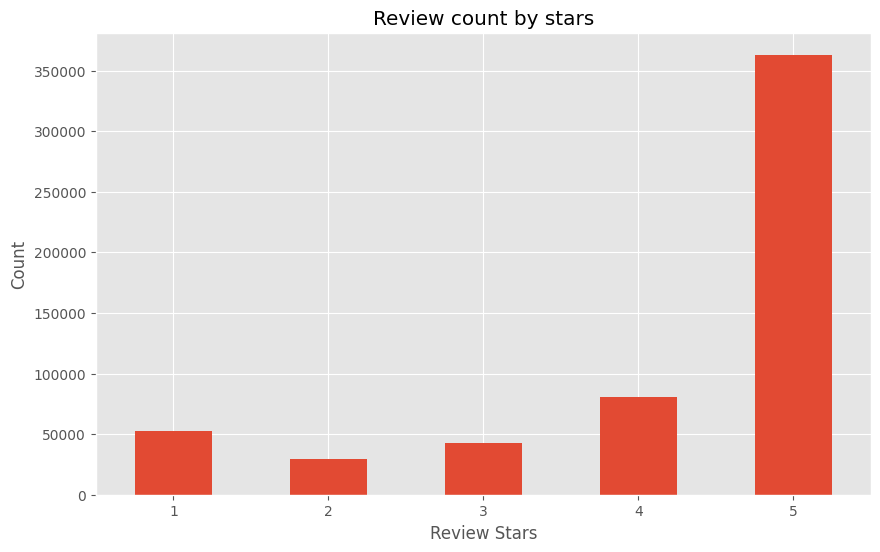

In [9]:
#EDA
df["Score"].value_counts().sort_index().plot(kind="bar",
                                             title="Review count by stars",
                                             figsize=(10,6),
                                             xlabel="Review Stars",
                                             ylabel="Count")
plt.xticks(rotation=0)
plt.show()

## Basic NLTK

In [10]:
eg=df["Text"][45]
print(eg)

This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


In [11]:
tokens = nltk.word_tokenize(eg)
tokens

['This',
 'seems',
 'a',
 'little',
 'more',
 'wholesome',
 'than',
 'some',
 'of',
 'the',
 'supermarket',
 'brands',
 ',',
 'but',
 'it',
 'is',
 'somewhat',
 'mushy',
 'and',
 'does',
 "n't",
 'have',
 'quite',
 'as',
 'much',
 'flavor',
 'either',
 '.',
 'It',
 'did',
 "n't",
 'pass',
 'muster',
 'with',
 'my',
 'kids',
 ',',
 'so',
 'I',
 'probably',
 'wo',
 "n't",
 'buy',
 'it',
 'again',
 '.']

In [12]:
sp_tag=nltk.pos_tag(tokens)
sp_tag

[('This', 'DT'),
 ('seems', 'VBZ'),
 ('a', 'DT'),
 ('little', 'RB'),
 ('more', 'RBR'),
 ('wholesome', 'JJ'),
 ('than', 'IN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('supermarket', 'NN'),
 ('brands', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('somewhat', 'RB'),
 ('mushy', 'JJ'),
 ('and', 'CC'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('quite', 'RB'),
 ('as', 'RB'),
 ('much', 'JJ'),
 ('flavor', 'NN'),
 ('either', 'RB'),
 ('.', '.'),
 ('It', 'PRP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('pass', 'VB'),
 ('muster', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('kids', 'NNS'),
 (',', ','),
 ('so', 'IN'),
 ('I', 'PRP'),
 ('probably', 'RB'),
 ('wo', 'MD'),
 ("n't", 'RB'),
 ('buy', 'VB'),
 ('it', 'PRP'),
 ('again', 'RB'),
 ('.', '.')]

In [13]:
entities=nltk.chunk.ne_chunk(sp_tag)
entities.pprint()

(S
  This/DT
  seems/VBZ
  a/DT
  little/RB
  more/RBR
  wholesome/JJ
  than/IN
  some/DT
  of/IN
  the/DT
  supermarket/NN
  brands/NNS
  ,/,
  but/CC
  it/PRP
  is/VBZ
  somewhat/RB
  mushy/JJ
  and/CC
  does/VBZ
  n't/RB
  have/VB
  quite/RB
  as/RB
  much/JJ
  flavor/NN
  either/RB
  ./.
  It/PRP
  did/VBD
  n't/RB
  pass/VB
  muster/NN
  with/IN
  my/PRP$
  kids/NNS
  ,/,
  so/IN
  I/PRP
  probably/RB
  wo/MD
  n't/RB
  buy/VB
  it/PRP
  again/RB
  ./.)


## Step 1. VADER Seniment Scoring¶
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

* This uses a "bag of words" approach:
1. Stop words are removed (and, the, etc.)
2. Each word is scored and combined to a total score

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
sia=SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores("I feel free now that it's done.")

{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}

In [17]:
sia.polarity_scores("I love ML.")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [18]:
sia.polarity_scores("I hate errors!")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.75}

In [19]:
sia.polarity_scores(eg)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
#Run the polarity score on entire dataset
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text=row["Text"]
    myid=row["Id"]
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.079,0.853,0.068,-0.1027
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.190,0.697,0.114,-0.4848
568452,0.037,0.884,0.078,0.4352
568453,0.041,0.506,0.452,0.9717


In [22]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={"index":"Id"})
vaders=vaders.merge(df,how='left')

In [23]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


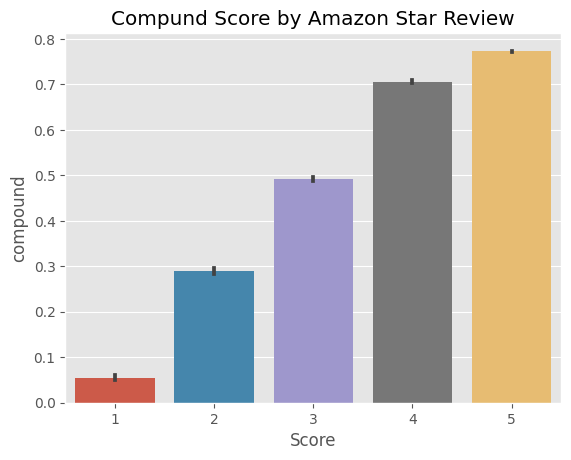

In [24]:
# Plot vaders results
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

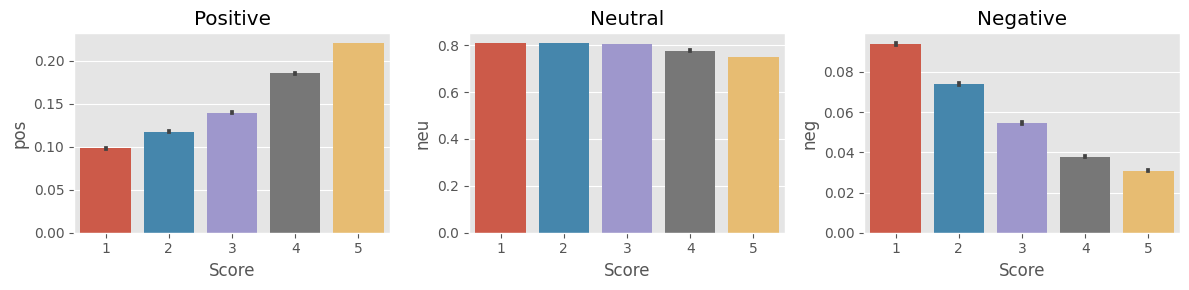

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Step 2. Roberta Pretrained Model¶
* Use a model trained of a large corpus of data.
* Transformer model accounts for the words but also the context related to other words.

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [28]:
#Vader Results
print(eg)
sia.polarity_scores(eg)

This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
#Roberta Results
encoded_text=tokenizer(eg,return_tensors="pt")
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.0586, -0.1314, -2.1002]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [30]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.8868877, 'roberta_neu': 0.09925437, 'roberta_pos': 0.013857958}


In [31]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [32]:
res = {}
for i, row in tqdm(df.head(1000).iterrows(), total=1000):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [33]:
df=df.head(1000)

In [34]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [35]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Step3. Combine and Compare

In [36]:
import warnings
warnings.filterwarnings('ignore')

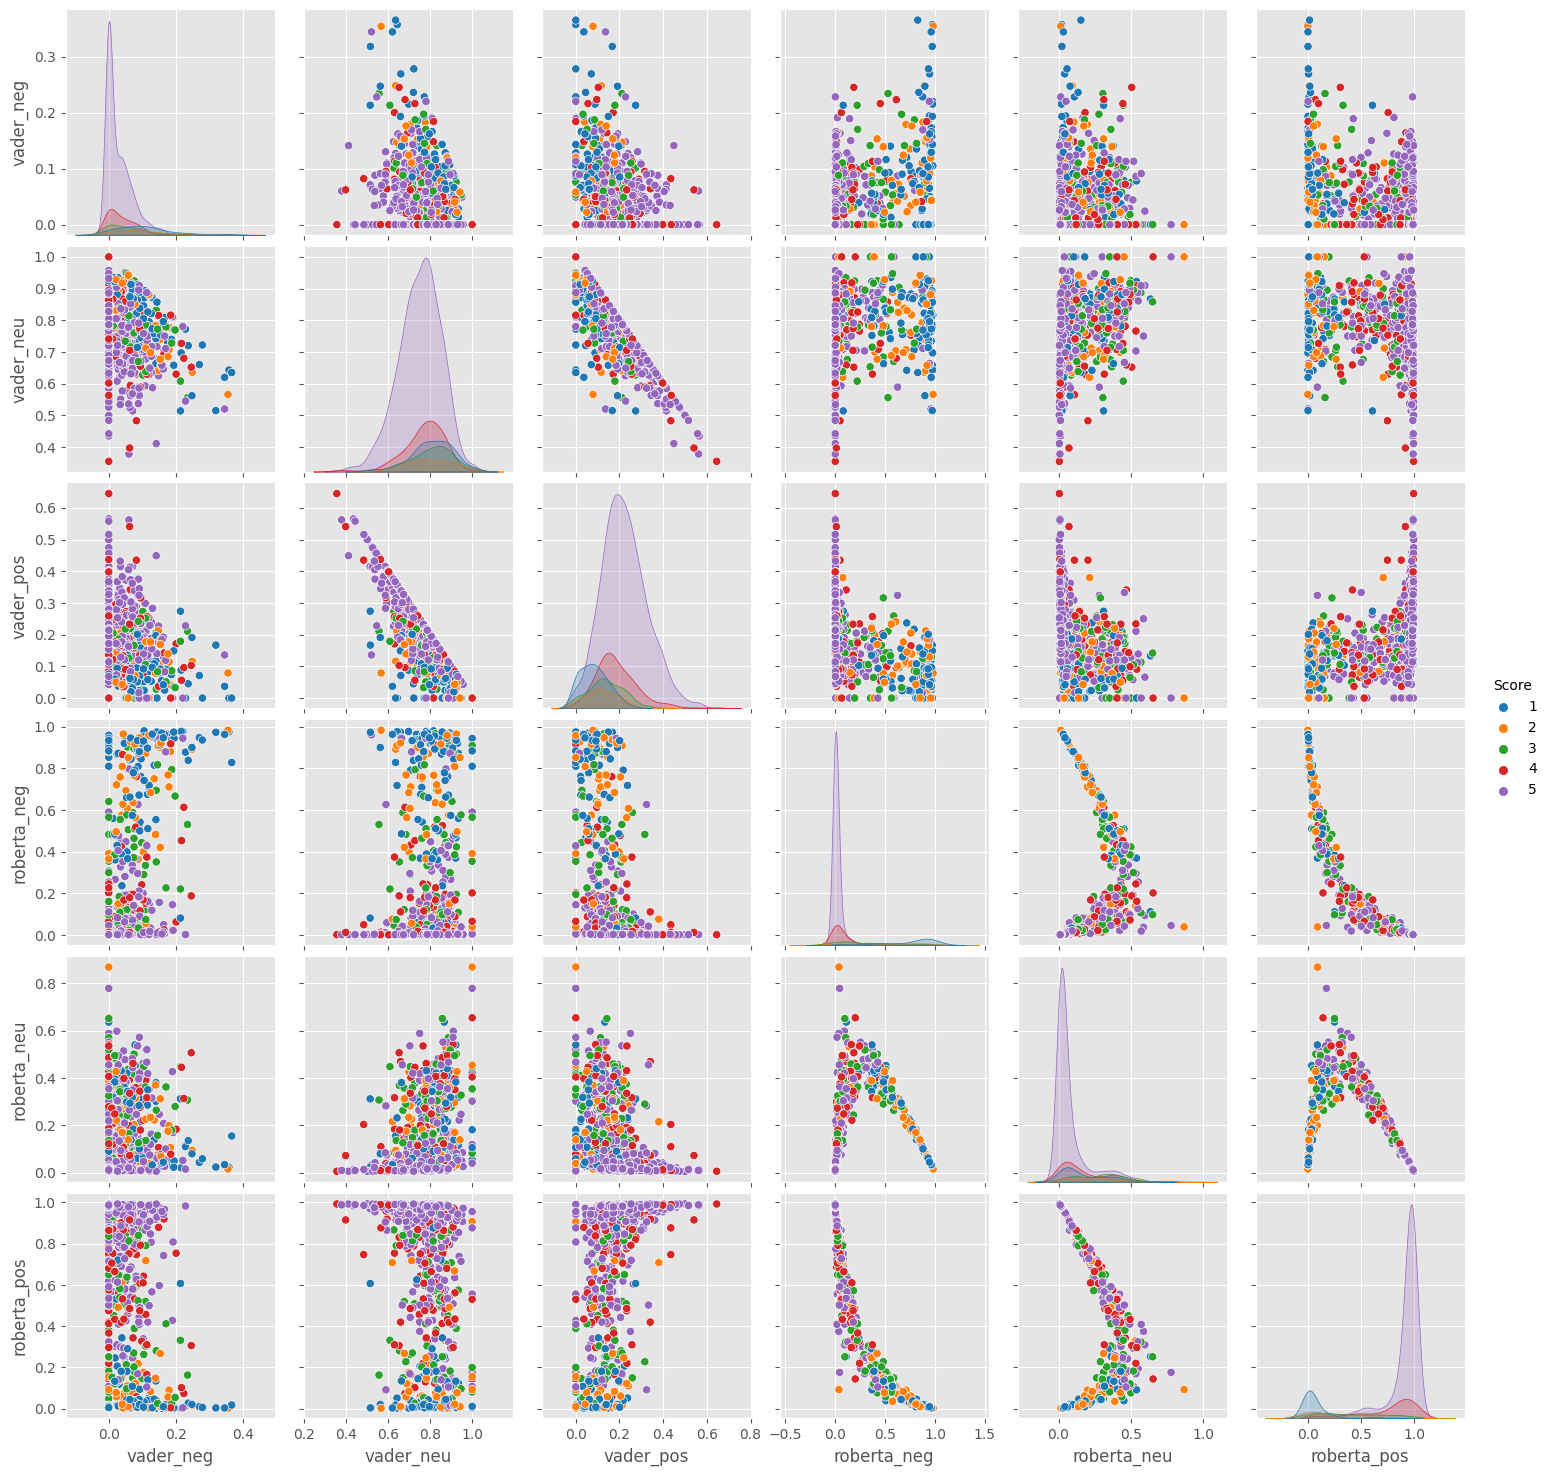

In [39]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Step 4: Review Examples:¶
* Positive 1-Star and Negative 5-Star Reviews
* Lets look at some examples where the model scoring and review score differ the most.

In [40]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [41]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [42]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [43]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: The Transformers Pipeline¶
* Quick & easy way to run sentiment predictions

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

2024-07-17 10:47:11.670280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 10:47:11.670378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 10:47:11.791619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [45]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [46]:
sent_pipeline("It's Okay!")

[{'label': 'POSITIVE', 'score': 0.9998331069946289}]

In [47]:
sent_pipeline("This looks bad!")

[{'label': 'NEGATIVE', 'score': 0.9997707009315491}]